In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statistics import mean

In [2]:
#import airbnb data
df = pd.read_csv("AB_NYC_2019.csv", header=0) #header=0 or not mentioning header is same, no row deleted
#print info
df.info()

#set index "id"
#df.set_index('id', inplace=True) #inplace will make id as index else no affect
#df.shape # gives length and width (# of rows x col)
print(len(df)) # gives length of the table (only # of rows)
print(len(set(df['number_of_reviews']))) # to check if values are repeating or unique
df.head() #gives first rows and all columns values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
#find total null or NaN values
df.isnull().sum()


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [4]:
#Replace null or NaN values with 0 in the last_review column
df.fillna({'last_review':0}, inplace=True)
df.last_review.isnull().sum() # to confirm last_review col null/Nan values are replaces with 0

0

In [5]:
#Data Cleansing by Replacing null or NaN values with 0 in the review_per_month column
df.fillna({'reviews_per_month':0}, inplace=True)
df.reviews_per_month.isnull().sum()

0

In [6]:
#Data Cleansing 
#drop null or NaN
df = df.dropna() #applying dropna() finally since most of the null values are in the reviews col, if null values are dropped
#rest of the row values also get deleted hence did not apply before replacing with 0 in reviews columns

In [7]:
#dimension
df.shape #after deleting 37 null values from host_id and host_name columns

(48858, 16)

In [8]:
#remove duplicates if any
df.duplicated().sum() # removes only numerical duplicates
#df.drop_duplicates(inplace=True)
#df.shape


0

In [10]:
df.to_csv('airbnb_cleaned.csv')

In [9]:
#Descriptive statistics
#drop unncessary columns that dont need descriptive stats
df.drop(['name', 'id', 'host_name', 'last_review', 'latitude', 'longitude', 'room_type', 'host_id', 'neighbourhood_group', 'neighbourhood'], axis=1, inplace=True)
df.describe() #descriptive stats for each col ex. df['price'].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,152.740309,7.012444,23.273098,1.091124,7.148369,112.801425
std,240.232386,20.019757,44.549898,1.597270,32.964600,131.610962
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Price and Number of reviews are negatively correlated


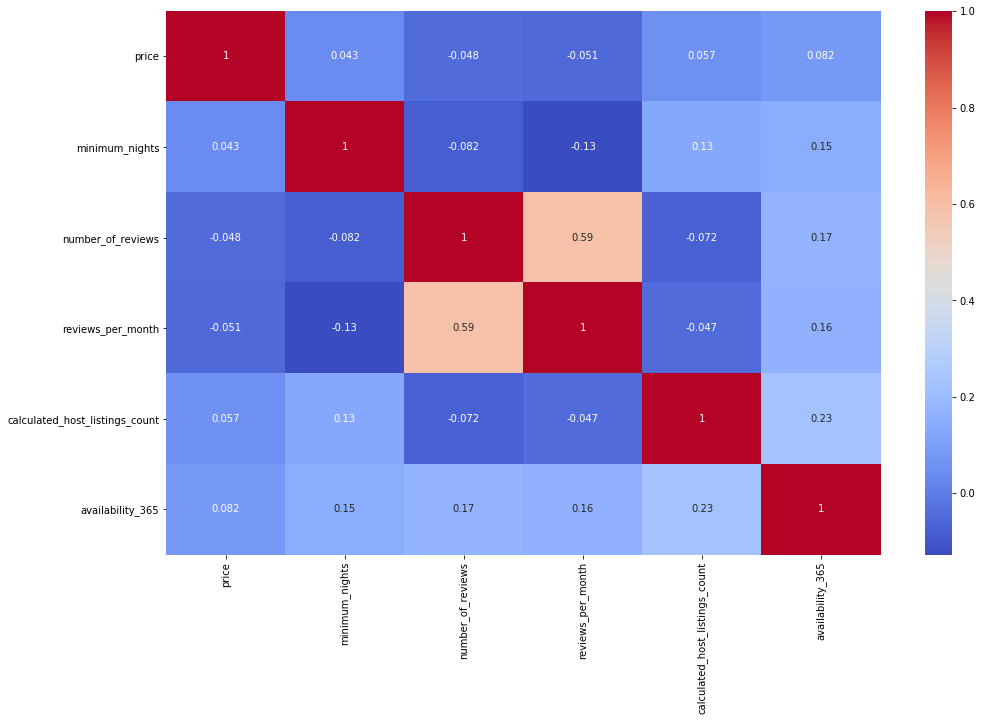

In [10]:
#Inferential statistics/Correlation
corr = df.corr()
plt.figure(figsize=(16,10))
ax = sns.heatmap(corr, annot=True, cmap='coolwarm')
print('Price and Number of reviews are negatively correlated')


In [ ]:
#Insight 1. None of the variales have strong correlations with Price ex. number of reviews or the minimum nights

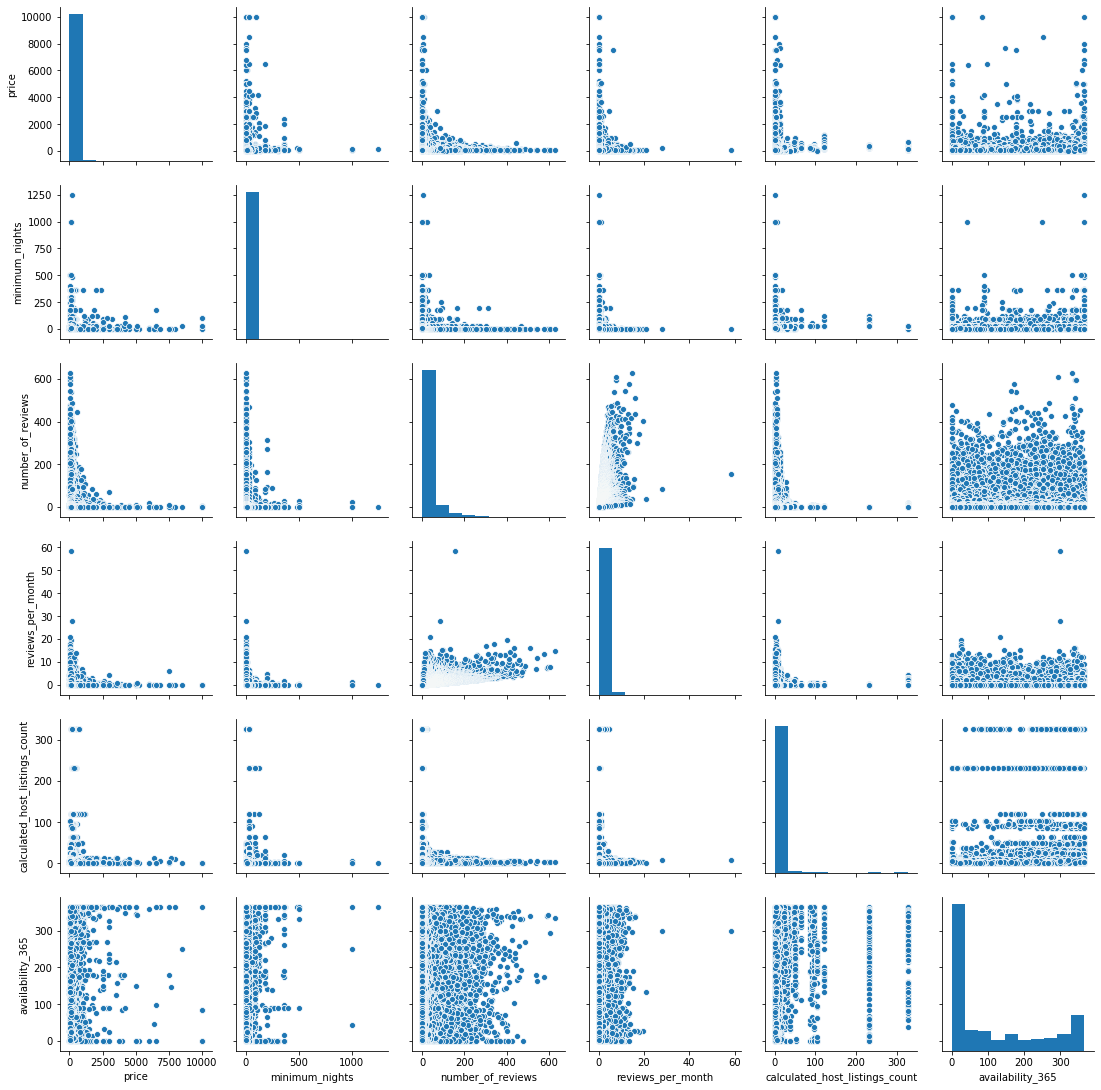

In [14]:
sns.pairplot(df)

In [ ]:
# Insight 2. A quick look at the pairplots of all numerical variables dont really show a linear trned in among themselves, 
# randomly scattered.

In [9]:
print(len(set(df['room_type'])))

3


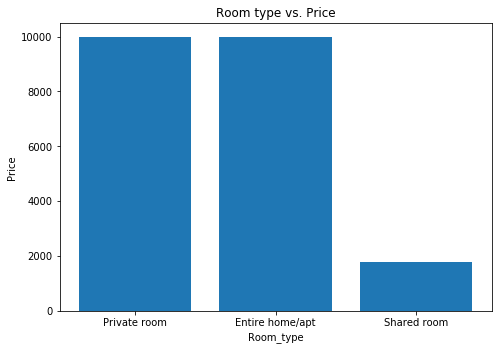

In [26]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df.room_type, df.price)
ax.set_xlabel('Room_type')
ax.set_title('Room type vs. Price')
ax.set_ylabel('Price')
plt.show()

In [ ]:
# Insight 3. When max. price is plotted against room type, Shared room type shows the least max. price of the room.

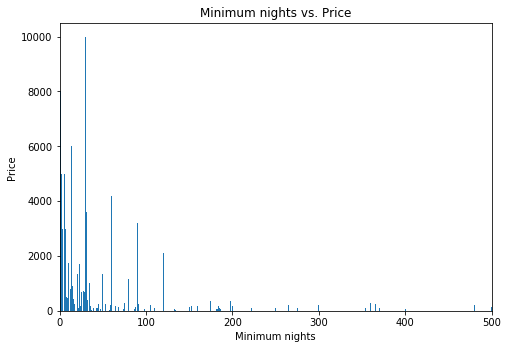

In [17]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df.minimum_nights, df.price)
ax.set_xlabel('Minimum nights')
ax.set_ylabel('Price')
ax.set_title('Minimum nights vs. Price')
ax.set_xlim(0, 500)
plt.show()

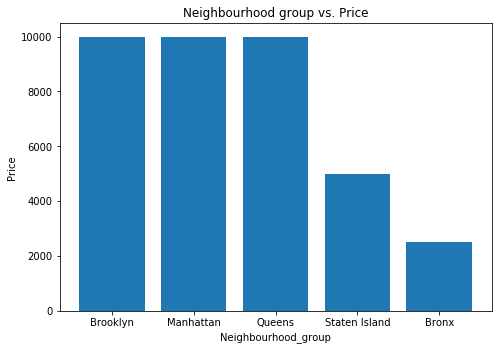

In [15]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df.neighbourhood_group, df.price)
ax.set_xlabel('Neighbourhood_group')
ax.set_title('Neighbourhood group vs. Price')
ax.set_ylabel('Price')
plt.show()

In [ ]:
# Insight 4. Max. Price vs. Neighborhood group shows that Bronx has the least max. pricing compared to Brooklyn and Manhattan which show the highest max pricing.

In [32]:
print(df)

             id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_grou

In [10]:
df.drop(['name', 'id', 'host_name', 'last_review', 'latitude', 'longitude', 'host_id', 'neighbourhood'], axis=1, inplace=True)

df_onehot1 = pd.get_dummies(df, columns=['neighbourhood_group',"room_type"], prefix = ['ng',"rt"],drop_first=True)

In [11]:
### Checking dataframe shape
df_onehot1.shape

(48858, 12)

In [12]:
X1= df_onehot1.loc[:, df_onehot1.columns != 'price']

In [13]:
Y1 = df_onehot1["price"]

In [26]:
#Linear Regression model prediction
Y=df["price"]

X=df[['number_of_reviews', 'minimum_nights', 'number_of_records', 'reviews_per_month', 'calculated_host_listings_count']]

#data splitting into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

print('Training Data Count: {}'.format(X_train.shape[0]))
print('Testing Data Count: {}'.format(X_test.shape[0]))



Training Data Count: 39086
Testing Data Count: 9772


In [14]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.20, random_state=42)

In [15]:
### Fitting Linear regression
reg1 = LinearRegression().fit(x_train1, y_train1)

In [16]:
### R squared value
reg1.score(x_train1, y_train1)

0.09274886461014142

In [27]:
#building model
X_train = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     107.9
Date:                Fri, 26 Jun 2020   Prob (F-statistic):          1.50e-113
Time:                        16:44:33   Log-Likelihood:            -2.6942e+05
No. Observations:               39086   AIC:                         5.388e+05
Df Residuals:                   39080   BIC:                         5.389e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            142.8700      1.770     80.695      0.000     139.400     146.340
number_of_reviews                 -0.1843      0.034     -5.447      0.000      -0.251      -0.118
minimum_nights                     0.2200      0.064      3.415      0.001       0.094       0.346
availability_365                   0.1581      0.010     16.256      0.000       0.139       0.177
reviews_per_month                 -6.3833      0.944     -6.759      0.000      -8.234      -4.532
calculated_host_listings_count     0.2258      0.038      5.908      0.000       0.151       0.301
==============================================================================
Omnibus:                    83108.174   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        523149863.353
Skew:                          18.641   Prob(JB):                         0.00
Kurtosis:                     568.544   Cond. No.                         262.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

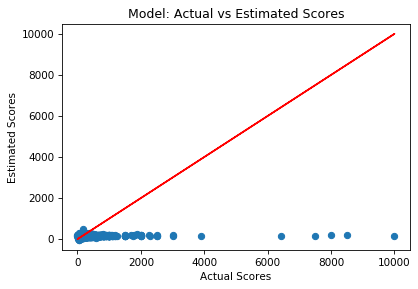

In [28]:
X_test = sm.add_constant(X_test)

y_preds = results.predict(X_test)

plt.figure(dpi = 75)
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual Scores")
plt.ylabel("Estimated Scores")
plt.title("Model: Actual vs Estimated Scores")
plt.show()

In [ ]:
# Insight 4. No linear trend between actual and estimated scores of max. price

In [48]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21000,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38000,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,nan,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64000,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10000,1,0
